# Homework 3: Data Visualization and Python Functions

## Due Tuesday, October 18th at 11:59PM

Welcome to Homework 3! This week, we will cover DataFrame manipulations, making visualizations, and defining functions. You can find additional help on these topics in  [BPD 10-12](https://notes.dsc10.com/02-data_sets/arrays.html) in the `babypandas` notes and [CIT 7-7.3](https://inferentialthinking.com/chapters/07/Visualization.html) in the textbook.

### Instructions

This assignment is due on Tuesday, October 18th at 11:59PM. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or EdStem. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 
**Please do not use for-loops for any questions in this homework.** If you don't know what a for-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

## 1. Winter is Coming ❄️ ⚔️

<img src="./images/Game_of_Thrones.jpeg" width=400/>

*Game of Thrones* is a hit fantasy-adventure series based on George R.R. Martin's book series, "A Song of Ice and Fire." The series is set in a fictional world, where powerful families, or "houses," fight for control of the Seven Kingdoms. In this question, we will investigate these battles.
The data used in this question comes from [Chris Albon's "The
War of the Five Kings" dataset](https://github.com/chrisalbon/war_of_the_five_kings_dataset), which contains detailed information on all of the battles in the series.

The file named `battles.csv` in the `data/` directory has a row for each battle, and the following columns.

|Column|Description|
|------|-----------|
|`'name'`|The name of the battle.|
|`'year'`|The year in which the battle took place. The dataset contains battles from the years 298 to 300.|
|`'attacker_king'`|The name of the king who was on the attacking side of the battle.|
|`'defender_king'`|The name of the king who was on the defending side of the battle.|
|`'major_death'`|Indicates whether a major character died during the battle. Values of `1.0` mean that some major character died, `0.0` means not.|
|`'major_capture'`|Indicates whether a major character was captured during the battle. Values of `1.0` mean that some major character was captured, `0.0` means not.|
|`'attacker_size'`|Number of people in the attacking army.|
|`'defender_size'`|Number of people in the defending army.|
|`'summer'`|Indicates if the battle took place in summer. Values of `1.0` mean the battle was in summer, `0.0` means not.|
|`'location'`|The specific location where the battle took place.|
|`'region'`|The more general region where the battle took place.|
|`'attacker_win'`| Indicates whether the attacking army won the battle. Values of `1.0` mean the attackers won, `0.0` means they lost.|

First, we'll read the data in as a DataFrame.

In [2]:
battles = bpd.read_csv('data/battles.csv')
battles

,name,year,attacker_king,defender_king,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_win
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,1
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,1
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,1
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,0
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33,Second Seige of Storm's End,300,Joffrey/Tommen Baratheon,Stannis Baratheon,0.0,0.0,NaN,200.0,0.0,Storm's End,The Stormlands,1
34,Siege of Dragonstone,300,Joffrey/Tommen Baratheon,Stannis Baratheon,0.0,0.0,2000.0,NaN,0.0,Dragonstone,The Stormlands,1
35,Siege of Riverrun,300,Joffrey/Tommen Baratheon,Robb Stark,0.0,0.0,3000.0,NaN,0.0,Riverrun,The Riverlands,1
36,Siege of Raventree,300,Joffrey/Tommen Baratheon,Robb Stark,0.0,1.0,1500.0,NaN,0.0,Raventree,The Riverlands,1


You may notice the DataFrame has many `NaN` values. `NaN` means "not a number," and it's how `babypandas` handles missing values. You don't need to worry about these, as they won't affect any of the calculations. Python knows to ignore them.

Let's explore certain columns to get to know the data a little better. The `.describe()` method gives us some useful information about a column. Try it out on the `name` column.

In [3]:
battles.get('name').describe()

count                             38
unique                            38
top       Battle of the Golden Tooth
freq                               1
Name: name, dtype: object

We learn that this column has 38 values, all of which are unique, and as a result the most frequent name appears only once.

If we try this same command on the `'attacker_king'` column, we'll see that although there are 36 values (and therefore 2 missing values), there are only 4 distinct values. There are many battles with the same `'attacker_king'`. The most common `'attacker_king'` is `'Joffrey/Tommen Baratheon'`, with 14 instances. 

In [4]:
battles.get('attacker_king').describe()

count                           36
unique                           4
top       Joffrey/Tommen Baratheon
freq                            14
Name: attacker_king, dtype: object

**Question 1.1.** The index of a DataFrame contains the label (or "name") of each row. Set the index of `battles` to whichever column makes the most sense. Make sure that you're actually changing the `battles` DataFrame! 

In [5]:
battles = battles.set_index('name')
battles

,year,attacker_king,defender_king,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_win
name,,,,,,,,,,,
Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,1
Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,1
Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,1
Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,0
Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,1
...,...,...,...,...,...,...,...,...,...,...,...
Second Seige of Storm's End,300,Joffrey/Tommen Baratheon,Stannis Baratheon,0.0,0.0,NaN,200.0,0.0,Storm's End,The Stormlands,1
Siege of Dragonstone,300,Joffrey/Tommen Baratheon,Stannis Baratheon,0.0,0.0,2000.0,NaN,0.0,Dragonstone,The Stormlands,1
Siege of Riverrun,300,Joffrey/Tommen Baratheon,Robb Stark,0.0,0.0,3000.0,NaN,0.0,Riverrun,The Riverlands,1


In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** Assign `weakest_attack` to the name of the battle with the smallest attacking army and `weakest_defense` to the name of the battle smallest defending army.

Similarly, assign `strongest_attack` to the name of the battle with the largest attacking army and `strongest_defense` to the name of the battle with the largest defending army

In the case of a tie, choose any one of the battles included in the tie.

_*Hint*_: When sorting values, `NaN` is always sorted to the last position, no matter if you chose to sort in ascending or descending order. Since there are `NaN` values in this dataset, accessing the last index will probably give you an incorrect answer. Sort accordingly!

In [7]:
weakest_attack = battles.sort_values('attacker_size').index[0]
print("Weakest attack:", weakest_attack)

strongest_attack = battles.sort_values('attacker_size', ascending=False).index[0]
print("Strongest attack:", strongest_attack)

weakest_defense = battles.sort_values('defender_size').index[0]
print("Weakest defense:", weakest_defense)

strongest_defense = battles.sort_values('defender_size', ascending=False).index[0]
print("Strongest defense:", strongest_defense)

Weakest attack: Battle of Winterfell
Strongest attack: Battle of Castle Black
Weakest defense: Sack of Harrenhal
Strongest defense: Siege of Storm's End


In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** Leaders often like to choose where their battles are fought so they can gain an advantage over their opponent.  Create a DataFrame named `wester_river_north` containing only the the battles from `'The Westerlands'`, `'The Riverlands'`, and `'The North'` regions. All columns of `battles` should be included.

In [9]:
wester_river_north = battles[(battles.get('region') == 'The Westerlands') | 
                             (battles.get('region') == 'The Riverlands') | 
                             (battles.get('region') == 'The North')]
wester_river_north

,year,attacker_king,defender_king,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_win
name,,,,,,,,,,,
Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,1
Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,1
Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,1
Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,0
Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,1
...,...,...,...,...,...,...,...,...,...,...,...
Sack of Saltpans,300,NaN,NaN,0.0,0.0,NaN,NaN,0.0,Saltpans,The Riverlands,1
Retaking of Deepwood Motte,300,Stannis Baratheon,Balon/Euron Greyjoy,0.0,0.0,4500.0,200.0,0.0,Deepwood Motte,The North,1
Siege of Riverrun,300,Joffrey/Tommen Baratheon,Robb Stark,0.0,0.0,3000.0,NaN,0.0,Riverrun,The Riverlands,1


In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Make an appropriate plot that would help you answer the question,

> Among battles from `'The Westerlands'`, `'The Riverlands'`,  and `'The North'` regions, do those with larger `'attacker_size'` also have larger `'defender_size'`?

You only need to make a plot, you don't need to answer the question above.

_*Notes*_:
- You may notice that some battles are missing from your plot. This is to be expected – if a battle is missing data for `'attacker_size'` or `'defender_size'`, it won't be displayed in your plot.
- You're encouraged to add a title to your plot, using the `title` optional argument, and to change the axis labels using the `plt.xlabel` and `plt.ylabel` functions, but you're not required to.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_4
manual: true
-->

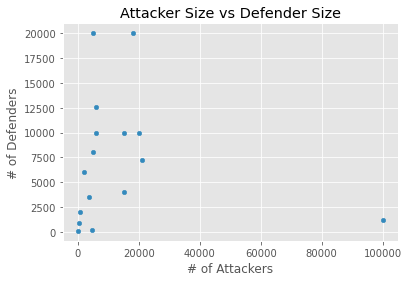

In [11]:
# Create your plot here
battles.plot(kind='scatter', x='attacker_size', y='defender_size', title='Attacker Size vs Defender Size');
plt.xlabel('# of Attackers');
plt.ylabel('# of Defenders');

<!-- END QUESTION -->



**Question 1.5.** Some characters in *Game of Thrones* have a large impact on the plot. When they die in battle, we record their deaths in the `'major_death'` column, which has a value of `1.0` if a major death occurred in that battle and `0.0` otherwise.

Create a DataFrame named `major_deaths`, indexed by `'attacker_king'`. This DataFrame should have just one column, named `'num_major'`, that contains the total number of major deaths that each `attacker_king` saw in their battles.

_*Hint*_: You will need to change the names of columns, which you can do using `.assign` and `.drop`. Instead of using `.drop`, you may want to use `.get` and pass in a `list` containing the name of a single column that you want to keep. This was done in [Lecture 8](https://dsc10.com/resources/lectures/lec08/lec08.html#Overlaid-plots).

In [12]:
major_deaths = battles.get(['attacker_king', 'major_death'])
major_deaths = major_deaths.assign(num_major = major_deaths.get('major_death')).drop(columns = 'major_death')
major_deaths = major_deaths.groupby('attacker_king').sum()
major_deaths

,num_major
attacker_king,
Balon/Euron Greyjoy,0.0
Joffrey/Tommen Baratheon,5.0
Robb Stark,5.0
Stannis Baratheon,3.0


In [13]:
grader.check("q1_5")

q1_5 results: All test cases passed!

**Question 1.6.** It turns out that there is at least one `'attacker_king'` that never had any major deaths in their battles. Below, assign `happy_kings` to an _array_ of the name(s) of these `'attacker_king'`(s). Use Python to extract the name(s) for you; do not type in any name(s).

In [14]:
happy_kings = np.array(major_deaths[major_deaths.get('num_major') == 0.0].reset_index().get('attacker_king'))
happy_kings 

array(['Balon/Euron Greyjoy'], dtype=object)

In [15]:
grader.check("q1_6")

q1_6 results: All test cases passed!

**Question 1.7.** Suppose that you are royalty in the *Game of Thrones* universe, and you want to conquer more land. You want to team up with the strongest kings, so you're trying to find out who can give you the best attacking army. You want to find armies that:
- Are large.
- Manage to get rid of their enemies' leaders often.
- Win often. 

Fortunately, these three properties correspond to three columns in `battles`. Create a DataFrame called `mean_stats`, indexed by `'attacker_king'`, that contains the mean `'attacker_size'`, `'major_death'`, and `'attacker_win'` for each king. `mean_stats` should only have these three columns.

In [16]:
mean_stats = battles.groupby('attacker_king').mean().drop(columns=['year', 'major_capture', 'summer', 'defender_size'])
mean_stats

,major_death,attacker_size,attacker_win
attacker_king,,,
Balon/Euron Greyjoy,0.000000,428.000,1.000000
Joffrey/Tommen Baratheon,0.357143,7577.250,0.928571
Robb Stark,0.500000,5152.375,0.800000
Stannis Baratheon,0.750000,27100.000,0.400000


In [17]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8.** While it might make for an entertaining show, it would be no fun to participate in a big battle. From the perspective of a soldier in battle, we'll say that a battle is considered "bad" if there were lots of attackers/defenders involved, if important people were captured, and if important people were killed. Additionally, we'll say that battles that take place in summer are considered worse, as the heat makes it harder for soldiers to carry heavy armor and equipment.

A battle's "badness rating" is a weighted average of these characteristics, with the weights as follows:

- ``'attacker_size'``: 20%
- ``'defender_size'``: 20%
- ``'major_death'``: 30%
- ``'major_capture'``: 20%
- ``'summer'``: 10%

For example, `'Battle of the Whispering Wood'` has:
- an `'attacker_size'` of 1875,
- a `'defender_size'` of 6000,
- a `'major_death'` of 1.0,
- a `'major_capture'` of 1.0, and
- a `'summer'` of 1.0,

so  `calculate_badness("Battle of the Whispering Wood")` should return `1575.6`. 

Define a function called `calculate_badness` that takes in a battle's name and outputs the battle's "badness rating".

_*Note*_: Once you've implemented `calculate_badness`, you should verify that your function works as intended, both for the example above and for other battles. This is good practice in general! 

In [18]:
def calculate_badness(name):
    battle = battles.reset_index()
    battle = battle[battle.get('name') == name]
    atk_per = battle.get('attacker_size').iloc[0] * .20
    #print(atk_per)
    def_per = battle.get('defender_size').iloc[0] * .20
    #print(def_per)
    death_per = battle.get('major_death').iloc[0] * .30
    #print(death_per)
    cap_per = battle.get('major_capture').iloc[0] * .20
    #print(cap_per)
    sum_per = battle.get('summer').iloc[0] * .10
    #print(sum_per)
    return atk_per + def_per + death_per + cap_per + sum_per
print(calculate_badness('Battle of the Golden Tooth')) #Should output 3800.4
calculate_badness('Battle of the Whispering Wood') #Should output 1575.6

3800.4


1575.6

In [19]:
grader.check("q1_8")

q1_8 results: All test cases passed!

**Question 1.9.** Use the `calculate_badness` function you've already written, along with the `.apply` method, to create an **array** called `badness_array` that contains the "badness rating" of each battle, in the same order as the rows of the `battles` DataFrame. Many battles may not have a "badness rating" if some data needed to calculate it is missing.

_*Hint*_: Note that the `.apply` method allows you to apply a function to any *column* in a DataFrame, but not to the index. Instead, try using `.apply` on a version of the DataFrame that has the index reset to its default.

In [20]:
badness_array = battles.reset_index()
badness_array = np.array(badness_array.get('name').apply(calculate_badness))
badness_array

array([ 3800.4,     nan,  5000.3,  7600.6,  1575.6,  3725.1,     nan,
           nan,     nan,     nan,   228.9,     nan,     nan,   524. ,
        3200.6,  5000.4,  6000.1,    40.4,     nan,  5650.6,     nan,
           nan,     nan,     nan,     nan,  1400.6,     nan, 20248.5,
           nan,     nan,   940. ,     nan,     nan,     nan,     nan,
           nan,     nan,     nan])

In [21]:
grader.check("q1_9")

q1_9 results: All test cases passed!

**Question 1.10.** Create a DataFrame called `with_badness` that contains all the columns of `battles` plus one more called `'badness'`, containing the values in `badness_array`. Order the rows in descending order of `'badness'`. Make sure `with_badness` has the same index as `battles`.

Then, save the name of the battle with the largest "badness rating" as `worst_battle`. 

In [22]:
with_badness = battles.reset_index()
with_badness = with_badness.assign(badness = with_badness.get('name').apply(calculate_badness))
worst_battle = with_badness.sort_values(by='badness', ascending=False).get('name').iloc[0]
with_badness = with_badness.set_index('name')

print('The battle with the largest "badness rating" is:', worst_battle)
with_badness

The battle with the largest "badness rating" is: Battle of Castle Black


,year,attacker_king,defender_king,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_win,badness
name,,,,,,,,,,,,
Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,15000.0,4000.0,1.0,Golden Tooth,The Westerlands,1,3800.4
Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,1.0,0.0,NaN,120.0,1.0,Mummer's Ford,The Riverlands,1,NaN
Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,0.0,1.0,15000.0,10000.0,1.0,Riverrun,The Riverlands,1,5000.3
Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,18000.0,20000.0,1.0,Green Fork,The Riverlands,0,7600.6
Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,1.0,1.0,1875.0,6000.0,1.0,Whispering Wood,The Riverlands,1,1575.6
...,...,...,...,...,...,...,...,...,...,...,...,...
Second Seige of Storm's End,300,Joffrey/Tommen Baratheon,Stannis Baratheon,0.0,0.0,NaN,200.0,0.0,Storm's End,The Stormlands,1,NaN
Siege of Dragonstone,300,Joffrey/Tommen Baratheon,Stannis Baratheon,0.0,0.0,2000.0,NaN,0.0,Dragonstone,The Stormlands,1,NaN
Siege of Riverrun,300,Joffrey/Tommen Baratheon,Robb Stark,0.0,0.0,3000.0,NaN,0.0,Riverrun,The Riverlands,1,NaN


In [23]:
grader.check("q1_10")

q1_10 results: All test cases passed!

## 2. Game On! 🎮

The last section was about _Game of Thrones_. This section is also about games... video games! (Bad joke, we know 🙄.)

Here, we'll work with a dataset taken from [Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) that contains sales information for thousands of video games, including some released this year. In the cell below, we load the dataset in as a DataFrame named `video_games`. Take some time to understand what each column of `video_games` represents, as we haven't provided you with a description of each column.

In [24]:
# Run this cell to load the dataset.
video_games = bpd.read_csv('data/video_game_ratings.csv')
video_games

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...
12630,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


**Question 2.1.** If you look at the `'votes'` column in the DataFrame, you'll notice that there are commas in some of the numbers. For example, in the second row of the DataFrame, the value in the `votes` column is `36,441`. These commas indicate that the `'votes'` column contains strings, not integers, since Python never displays integers with commas.

Write a function `convert_votes_to_int` that takes in a string `v` as input and outputs `v` as an integer, after removing any commas. 

Then, use your function to update the `'votes'` column in the `video_games` DataFrame so that it contains integers rather than strings. Make sure to "save" your changes in the `video_games` DataFrame!

_Hint_: You can use the `.assign` method to replace values in the `'votes'` column, without having to create an additional column.

In [25]:
def convert_votes_to_int(v):
    return int(v.replace(',', ''))

In [26]:
video_games = video_games.assign(votes = video_games.get('votes').apply(convert_votes_to_int))
video_games

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,36441,Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,7610,Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,26328,Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013,"Action, Adventure, Drama",9.7,61103,"Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...
12630,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


In [27]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** You are curious as to whether there is a relationship between the number of votes a game receives and the rating of the game. Create an appropriate plot that shows the relationship between these two variables.

Then use the plot you made to answer the following question: 

> What type of ratings do video games with a higher number of votes tend to have?

Assign an integer from 1 to 3 representing your answer to the variable `q2_2`.

1. Video games with a higher number of votes tend to have higher ratings.
2. Video games with a higher number of votes tend to have lower ratings.
3. There is no association between number of votes and rating.

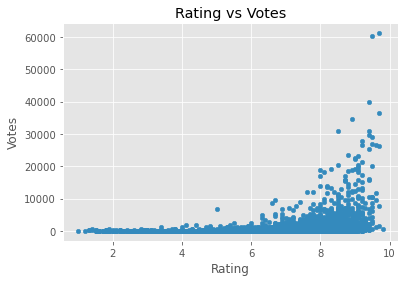

In [28]:
# Create your plot here
video_games.plot(kind='scatter', x='rating', y='votes', title='Rating vs Votes');
plt.xlabel('Rating');
plt.ylabel('Votes');

In [29]:
q2_2 = 3
q2_2

3

In [30]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Assign `most_common_genres` to a DataFrame that contains the ten most common genres of video games, in descending order. The DataFrame should be indexed by `'genre'` and have only one column, `'count'`, which is the number of video games in that genre.

*Note:* For this question, we will treat each video game as having only one genre. For example, `'Action, Adventure, Drama'` is considered to be its own genre.

In [31]:
most_common_genres = video_games.groupby('genre').count()
most_common_genres = most_common_genres.assign(count = most_common_genres.get('title')).drop(columns = ['title', 'year', 'rating', 'votes', 'directors', 'plot'])
most_common_genres = most_common_genres.sort_values(by='count', ascending=False)
most_common_genres = most_common_genres.iloc[:10]
most_common_genres

,count
genre,
Action,1402
"Action, Adventure, Fantasy",1329
Sport,789
Adventure,701
"Action, Adventure, Sci-Fi",534
"Action, Sci-Fi",533
"Action, Adventure, Comedy",440
"Action, Adventure, Family",430
"Action, Adventure",381


In [32]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Using the `most_common_genres` DataFrame you created in Question 2.3, create a horizontal bar chart that shows the distribution of video games into these ten genres. Make sure your plot has the most common genre as the top-most bar in the bar chart.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_4
manual: true
-->

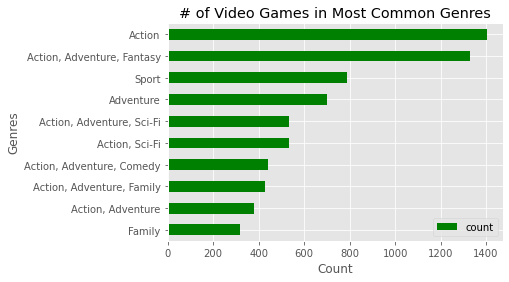

In [33]:
# Create your plot here

most_common_genres.sort_values(by='count').reset_index().plot(
    kind='barh', 
    x='genre', 
    y='count', 
    title='# of Video Games in Most Common Genres',
    color='green');
plt.xlabel('Count');
plt.ylabel('Genres');

<!-- END QUESTION -->



**Question 2.5.** Assign the variable `third_lowest` to the genre of video games with the third lowest average rating (among all genres, not just the ones you looked at in Questions 2.3 and 2.4).

Do not manually type out your answer. Use `babypandas` methods to produce the answer.

*Note:* Again, we will consider a video game with multiple genres to have only one genre. For example, `'Action, Adventure, Drama'` is considered to be its own genre.

In [34]:
third_lowest = video_games.groupby('genre').mean().sort_values(by='rating', ascending=True)
third_lowest = third_lowest.index[2]
third_lowest

'Animation, Drama, Romance'

In [35]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6.** Create a histogram showing the distribution of video game ratings in the `video_games` DataFrame.

Remember to set `density=True` since we always use density histograms and `ec='w'` to make the separation of the bars more clear. You don't have to set the `bins` argument.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->

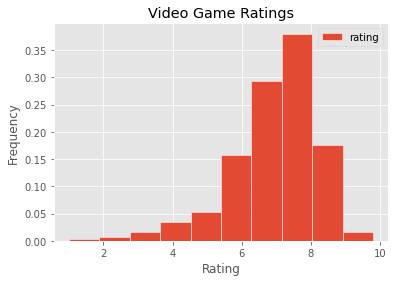

In [36]:
# Create your plot here
video_games.plot(kind='hist', y='rating', ec='w', density=True, title='Video Game Ratings');
plt.xlabel('Rating');

<!-- END QUESTION -->



<br>

**Question 2.7.** There is one director who has directed exactly 27 video games **alone** (with no-codirectors).

Below, assign `director_of_27` to the name of this director. Do not manually type out the director's name. Instead, use `babypandas` methods to extract the name.

<!--
BEGIN QUESTION
name: q2_7
-->

In [37]:
director_of_27 = video_games.groupby('directors').count().sort_values(by='title', ascending=False)
director_of_27 = director_of_27[director_of_27.get('title') == 27]
director_of_27 = director_of_27.index[0]
director_of_27

'Keith Arem'

In [38]:
grader.check("q2_7")

q2_7 results: All test cases passed!

## 3. The Best Invention of the 20th Century 🍜

Instant ramen was first invented by Momofuku Ando in 1958 to cure hunger during wartime. It started off with only one kind for its original purpose, but the instant ramen industry has expanded over the years, and now there are over 100 different kinds of instant ramen. At the turn of the millenium, 2000 Japanese citizens even [ranked](https://abcnews.go.com/International/story?id=81946&page=1) instant ramen as the best invention of the 20th century! Click [here](https://www.cupnoodles-museum.jp/en/osaka_ikeda/) to learn more about the history of this quintessential college meal.

<img src="./images/noodles-lowres-8607.png" width=350/>

We have a [dataset of instant ramen ratings from Kaggle](https://www.kaggle.com/datasets/residentmario/ramen-ratings?resource=download). First, we'll read in the data from a CSV. There is no good index, so we will leave it unset.

In [39]:
ramen_data = bpd.read_csv('data/ramen-rating.csv')
ramen_data

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,JP,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,TW,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,TW,2.75
4,Ching's Secret,Singapore Curry,Pack,IN,3.75
...,...,...,...,...,...
2572,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,VN,3.50
2573,Wai Wai,Oriental Style Instant Noodles,Pack,TH,1.00
2574,Wai Wai,Tom Yum Shrimp,Pack,TH,2.00
2575,Wai Wai,Tom Yum Chili Flavor,Pack,TH,2.00


Notice that the `'Country'` column contains a country code. We want to convert these country codes into actual country names that everyone can understand.

We'll use a Python [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm) to help us with this conversion. A dictionary is a simple way to map a unique key to a value. For example, the dictionary below maps course codes to course names.

In [40]:
dsc_courses = {
    # key: value
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [41]:
dsc30_name = dsc_courses['DSC 30']
dsc30_name

'Data Structures and Algorithms for Data Science'

Here, `'DSC 30'` is the key and `'Data Structures and Algorithms for Data Science'` is the value.

Let's use a dictionary to help us with our country code to country name conversion. Below is a dictionary containing country codes as keys and country names as values for each of the countries in our ramen dataset.

In [42]:
# Run this cell, DO NOT change it.
country_codes = {
    'AU':'Australia',
    'BD':'Bangladesh', 
    'BR':'Brazil', 
    'KH':'Cambodia' , 
    'CA':'Canada', 
    'CN':'China',
    'CO':'Colombia', 
    'DXB':'Dubai' , 
    'EE':'Estonia' , 
    'FIJI':'Fiji', 
    'FI':'Finland' , 
    'DE':'Germany',
    'GHAN':'Ghana' , 
    'NL':'Holland', 
    'HK':'Hong Kong', 
    'HU':'Hungary', 
    'IN':'India', 
    'ID':'Indonesia',
    'JP':'Japan', 
    'MY':'Malaysia', 
    'MX':'Mexico', 
    'MM':'Myanmar', 
    'NP':'Nepal', 
    'AN':'Netherlands',
    'NG':'Nigeria', 
    'PK':'Pakistan', 
    'PH':'Philippines', 
    'PL':'Poland', 
    'SWK':'Sarawak',
    'SG':'Singapore', 
    'KOR':'South Korea', 
    'SE':'Sweden', 
    'TW':'Taiwan', 
    'TH':'Thailand', 
    'UK' :'United Kingdom' ,
    'USA':'United States', 
    'VN':'Vietnam' 
    }

**Question 3.1.** Using the dictionary `country_codes`, define a function named `code_to_country` that takes as input a country code and returns the corresponding country's name. This should only take one line of code.

_*Hints*_: 
- If you're stuck, take a look at the DSC 30 example above.
- Once you've implemented `code_to_country`, you should verify that it works as intended by trying a few examples yourself. The provided tests will **not** do this for you.

In [43]:
def code_to_country(code):
    return country_codes[code]

In [44]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Use your `code_to_country` function and the `.apply` method to convert all of the country codes in the `'Country'` column of `ramen_data` into country names. Do this without creating an additional column or reordering the existing columns. Assign the resulting DataFrame to the variable name `ramen`.

In [45]:
ramen = ramen_data.assign(Country = ramen_data.get('Country').apply(code_to_country))
ramen

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,United States,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...
2572,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50
2573,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
2574,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
2575,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


In [46]:
grader.check("q3_2")

q3_2 results: All test cases passed!

🚨 **Important**: For the rest of the questions in this section, use the DataFrame `ramen` instead of `ramen_data`.

**Question 3.3.** 
Define a function named `word_count` that returns the number of words in a ramen's `'Variety'`. It should take as input a string from the `'Variety'` column and  return the number of words in that string. We'll consider a piece of text to be a word if and only if it is separated from adjacent words by a space. 
For example:
- `word_count('Cup Noodles Chicken Vegetable')` should return 4.
- `word_count('Tonkotsu-Shoyu Rich Pork Flavor Ramen')` should return 5. Notice that `'Tonkotsu-Shoyu'` counts as one word.

_*Hint*_: The string method [`.split`](https://docs.python.org/3/library/stdtypes.html#str.split) will be helpful.

In [47]:
def word_count(variety):
    return len(variety.strip().split(' '))
    
# Test cases for your own reference. Feel free to test out more!
print(word_count('Cup Noodles Chicken Vegetable'))  # Should print 4
print(word_count('Tonkotsu-Shoyu Rich Pork Flavor Ramen')) # Should print 5
print(word_count("T's Restaurant Tantanmen"))
print(word_count(ramen.get('Variety').iloc[0]))

4
5
3
3


In [48]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Create a DataFrame called `with_word_count` with columns from left to right `'Brand'`, `'Country'`, `'Variety'` and `'Stars'` and a new column `'Word_Count'` that has the word count for each variety. Sort the DataFrame in descending order of `'Word_Count'`.

_*Note*_: The `'Country'` column should have full country names, not codes.

In [49]:
with_word_count = bpd.DataFrame().assign(
        Brand = ramen.get('Brand'),
        Country = ramen.get('Country'),
        Variety = ramen.get('Variety'),
        Stars = ramen.get('Stars'),
        Word_Count = ramen.get('Variety').apply(word_count))
with_word_count = with_word_count.sort_values('Word_Count', ascending=False)
with_word_count

,Brand,Country,Variety,Stars,Word_Count
1313,ABC,Indonesia,Selera Pedas Mi Goreng Cup Rasa Ayam Pedas Lim...,4.25,13
652,Nissin,United States,Bowl Noodles Hot & Spicy Chicken Flavor Less S...,4.00,12
475,Roland,United States,Ramen Japanese Style Quick-Cooking Alimentary ...,0.00,12
423,Jingqi,Taiwan,Aloe Vera Guan Mian Purple Sweet Potato Noodle...,4.00,12
370,Roland,United States,Ramen Japanese Style Quick-Cooking Alimentary ...,0.00,12
...,...,...,...,...,...
1802,JML,China,Seafood,3.00,1
1800,Mr. Noodles,Canada,Oriental,2.75,1
2113,Mama,Thailand,Vegetable,3.25,1
2066,Menraku,Japan,Miso,2.75,1


In [50]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** How many words does the longest ramen `'Variety'` have? Assign this number to `most_ramen_words`. How many words does the shortest ramen `'Variety'` have? Assign this number to `fewest_ramen_words`. What is the absolute difference between these values? Assign this number to `range_ramen_words`.

In [51]:
#Since the DataFrame is already sorted, there is no need to sort again here
most_ramen_words = with_word_count.get('Word_Count').iloc[0]
fewest_ramen_words = with_word_count.get('Word_Count').iloc[-1]
range_ramen_words = abs(with_word_count.get('Word_Count').iloc[0] - with_word_count.get('Word_Count').iloc[-1])

print('Most ramen words', most_ramen_words)
print('Fewest ramen words:', fewest_ramen_words)
print('Range of ramen words:', range_ramen_words)

Most ramen words 13
Fewest ramen words: 1
Range of ramen words: 12


In [52]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** Create a function named `mean_word_count` that takes as an input the name of a ramen brand and returns the average `'Word_Count'` for all ramen varieties belonging to that brand.

In [53]:
def mean_word_count(brand):
    grouped_brand = with_word_count.groupby('Brand').mean().reset_index()
    return grouped_brand[grouped_brand.get('Brand') == brand].get('Word_Count').iloc[0]
mean_word_count('Nissin')
mean_word_count('Maruchan')
mean_word_count('Omachi')

1.0

In [54]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** Create a horizontal bar chart that displays the mean word count for all ramen brands that have **more than 10 varieties**. Sort the bars so the brands whose varieties have the most words on average appear at the very top, and those with the fewest words on average appear at the bottom.

_*Hints*_: 
- If you use `.groupby` more than once on the same DataFrame, the order of rows will be the same, even with different aggregation methods, as long as the column you group by is the same.
- To get the bar chart to display nicely, try adjusting the optional `figsize` argument, as we did in [Lecture 8](https://dsc10.com/resources/lectures/lec08/lec08.html#Numerical-variables).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_7
manual: true
-->

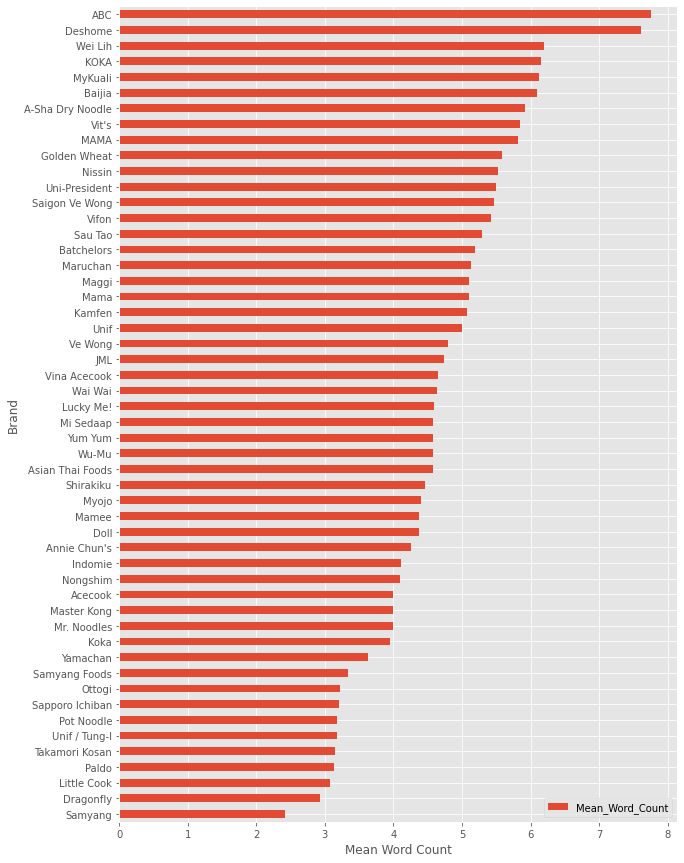

In [55]:
# Create your plot here
accum_brand = with_word_count.groupby('Brand').count()
accum_brand = accum_brand[accum_brand.get('Word_Count') > 10]
sorted_brand = bpd.DataFrame().assign(Brand = accum_brand.reset_index().get('Brand'), 
                                      Mean_Word_Count = accum_brand.reset_index().get('Brand').apply(mean_word_count))
sorted_brand = sorted_brand.set_index('Brand').sort_values('Mean_Word_Count')
sorted_brand.plot(kind='barh', y='Mean_Word_Count', figsize=(10,15));
plt.xlabel('Mean Word Count');

<!-- END QUESTION -->



**Question 3.8.** Define a function named `point_total` that takes in a full country name and returns a point total for that country's ramen, according to the following scheme:
- 1 point for every variety of ramen that has at least 1 star and less than 3 stars,
- 2 points for every variety with at least 3 stars and less than 4 stars, and
- 3 points for every variety with at least 4 stars (and at most 5 stars, which is the maximum possible).

|Points Received | Stars (Condition)| 
| --- | --- | 
|1| $[1,3)$|
|2| $[3, 4)$ | 
|3| $[4,5]$ |

_*Hint*_: Make sure that your function works for countries that don't have varieties of ramen at every possible number of stars. If you aren't able to accomplish this using grouping, try another strategy! Remember, don't use a for-loop. There is a better solution using DataFrame manipulations.

In [56]:
def point_total(country):
    ramen_country = ramen[ramen.get('Country') == country]
    three_point = ramen_country[ramen_country.get('Stars') >= 4].get('Country').shape[0] * 3 
    two_point = ramen_country[(3 <= ramen_country.get('Stars')) & (ramen_country.get('Stars') < 4)].get('Country').shape[0] * 2
    one_point = ramen_country[(1 <= ramen_country.get('Stars')) & (ramen_country.get('Stars') < 3)].get('Country').shape[0] * 1
    zero_point = ramen_country[(ramen_country.get('Stars') < 1)].get('Country').shape[0] * 0
    return zero_point + one_point + two_point + three_point
point_total('Vietnam')
point_total('Tunisia')
point_total('Japan')

885

In [57]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Among the five countries listed below, which has the **highest** point total, using the points system from Question 3.8?

-  `'United States'`
-  `'Canada'`
-  `'Sweden'`
-  `'China'`
-  `'Japan'`

Save the name (not country code) of the country as `country` and the country's number of points as `points`. You can set the value of `country` and `points` by hand for this question based on the output of the function you just wrote, for various inputs.

In [58]:
country = ramen.groupby('Country').max().reset_index()
country = country.assign(Points = country.get('Country').apply(point_total))
country = country.sort_values(by='Points', ascending=False)

big_five = ['United States', 'Canada', 'Sweden', 'China', 'Japan']
big_five_countries = country[(country.get('Country') == big_five[0]) 
                  | (country.get('Country') == big_five[1]) 
                  | (country.get('Country') == big_five[2]) 
                  | (country.get('Country') == big_five[3]) 
                  | (country.get('Country') == big_five[4])]

country = big_five_countries.sort_values('Points', ascending=False)
country = big_five_countries.get('Country').iloc[0]

points = big_five_countries.get('Points').iloc[0]

print("Highest Scoring Country:", country)
print("With a score of:", points)

Highest Scoring Country: Japan
With a score of: 885


/opt/conda/lib/python3.9/site-packages/babypandas/bpd.py:1533: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  a = func(*vargs, **kwargs)


In [59]:
grader.check("q3_9")

q3_9 results: All test cases passed!

*Note*: While they don't serve _instant_ ramen, a new ramen restaurant just opened on campus, named [Underbelly](https://sandiego.eater.com/2022/10/3/23385430/izakaya-underbelly-japanese-restaurant-ramen-cocktail-bar-new-opening-ucsd). It's the second ramen restaurant on campus, joining [Showa](https://showaramen.com), which opened earlier this year. Try them out and see how many stars they deserve! ⭐

## 4. Final Stretch 🧘‍♀️

Suppose we have a DataFrame called `data` with two numerical columns, `'x'` and `'y'`. Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

<img src="./images/q4_scatter.png" width=400/>

Now consider these two histograms:

<center>
    <table><tr>
        <td><center><b>Histogram A</b><br> <img src="images/q4_hist_one.png" width=400></center> </td>
        <td><center><b>Histogram B</b><br> <img src="images/q4_hist_two.png" width=400></center> </td>
    </tr></table>
</center>

**Question 4.1.** Which of the following lines of code generated Histogram A? Assign either `1`, `2`, `3`, or `4` to `which_code`.
 1. `data.plot(kind='hist', density=False, y='x')`
 2. `data.plot(kind='hist', density=False, y='y')` 
 3. `data.plot(kind='hist', density=True, y='x')`
 4. `data.plot(kind='hist', density=True, y='y')`

In [60]:
which_code = 4

In [61]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Suppose we run this block of code:

```py
new_data = bpd.DataFrame().assign(
    x = data.get('x') / 6,
    y = data.get('y')
)
```
    
We then run 

`new_data.plot(kind='hist', density=True, y='x')`.

How will this histogram look compared to the histogram created by 

`data.plot(kind='hist', density=True, y='x')`, 

assuming both histograms are drawn on the same axes? Assign `histogram_difference` to either 1, 2, 3, or 4, corresponding to your choice.

1. The `new_data` histogram will be wider and taller than the `data` histogram.
2. The `new_data` histogram will be wider and shorter than the `data` histogram.
3. The `new_data` histogram will be narrower and taller than the `data` histogram.
4. The `new_data` histogram will be narrower and shorter than the `data` histogram.

_*Hint*_: Look at the end of [Lecture 8](https://dsc10.com/resources/lectures/lec08/lec08.html#Plotting-overlaid-histograms) for an example of two histograms drawn on the same axes.

In [62]:
histogram_difference = 3

In [63]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Below, we show Histogram B again.

<img src="./images/q4_hist_two.png" width=400/>

What **percent** of values in Histogram B are between -4 (inclusive) and -2 (exclusive)? While we cannot answer this question exactly since we do not know where the bins start and end, we can still approximate the answer. Assign the variable `percent_between` to a number 1 through 5, corresponding to the closest answer.

1. 10% 
2. 13% 
3. 27%
4. 35%
5. 48%

In [64]:
percent_between = 3

In [65]:
grader.check("q4_3")

q4_3 results: All test cases passed!

## Finish Line 

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [66]:
grader.check_all()

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_5 results: All test cases passed!

q2_7 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_8 results: All test cases passed!

q3_9 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!